# 10 Studi Kasus dari Dataset COVID-19
## Nama: Abraham Roy Rudianto
## NIM: 1301213202
## Mata Kuliah: Visualisasi Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('covid.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Bersihkan rate
df['Case Fatality Rate'] = pd.to_numeric(df['Case Fatality Rate'].astype(str).str.replace('%', ''), errors='coerce')
df['Case Recovered Rate'] = pd.to_numeric(df['Case Recovered Rate'].astype(str).str.replace('%', ''), errors='coerce')

# Filter nasional & hapus Date kosong
df_idn = df[df['Location Level'] == 'Country'].dropna(subset=['Date']).copy()
df_idn = df_idn.sort_values('Date').reset_index(drop=True)

print(f"Data nasional: {len(df_idn)} hari | {df_idn['Date'].min().date()} → {df_idn['Date'].max().date()}")

Data nasional: 200 hari | 2020-01-04 → 2021-12-06


In [12]:
df_idn.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,200,NaN,NaN,NaN,2020-11-15 01:33:36,2020-01-04 00:00:00,2020-06-03 18:00:00,2020-11-03 12:00:00,2021-05-03 06:00:00,2021-12-06 00:00:00,NaN
Location ISO Code,200,1,IDN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,200,1,Indonesia,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Cases,200.0,NaN,NaN,NaN,5217.815,0.0,1364.0,4079.5,6342.25,38391.0,6421.317444
New Deaths,200.0,NaN,NaN,NaN,135.02,0.0,50.0,103.5,177.5,1040.0,145.953354
New Recovered,200.0,NaN,NaN,NaN,4280.9,0.0,810.5,3754.5,6074.0,28975.0,4191.122518
New Active Cases,200.0,NaN,NaN,NaN,801.895,-5926.0,-78.25,281.0,866.0,18504.0,3235.06532
Total Cases,200.0,NaN,NaN,NaN,715245.865,2.0,61780.25,427685.0,1381385.5,2455912.0,728070.091396
Total Deaths,200.0,NaN,NaN,NaN,20529.295,0.0,3075.75,14395.0,37336.25,64631.0,19213.111132
Total Recovered,200.0,NaN,NaN,NaN,614739.03,0.0,28056.25,358923.5,1196837.25,2023548.0,650147.750426


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Muat dataset
df = pd.read_csv('covid.csv', parse_dates=['Date'])

# Pastikan tipe data benar
df['Date'] = pd.to_datetime(df['Date'])
df['New Cases'] = pd.to_numeric(df['New Cases'], errors='coerce')
df['New Deaths'] = pd.to_numeric(df['New Deaths'], errors='coerce')
df['Total Cases'] = pd.to_numeric(df['Total Cases'], errors='coerce')
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['Population Density'] = pd.to_numeric(df['Population Density'], errors='coerce')

# Filter hanya provinsi dan negara
df = df[df['Location Level'].isin(['Province', 'Country'])]

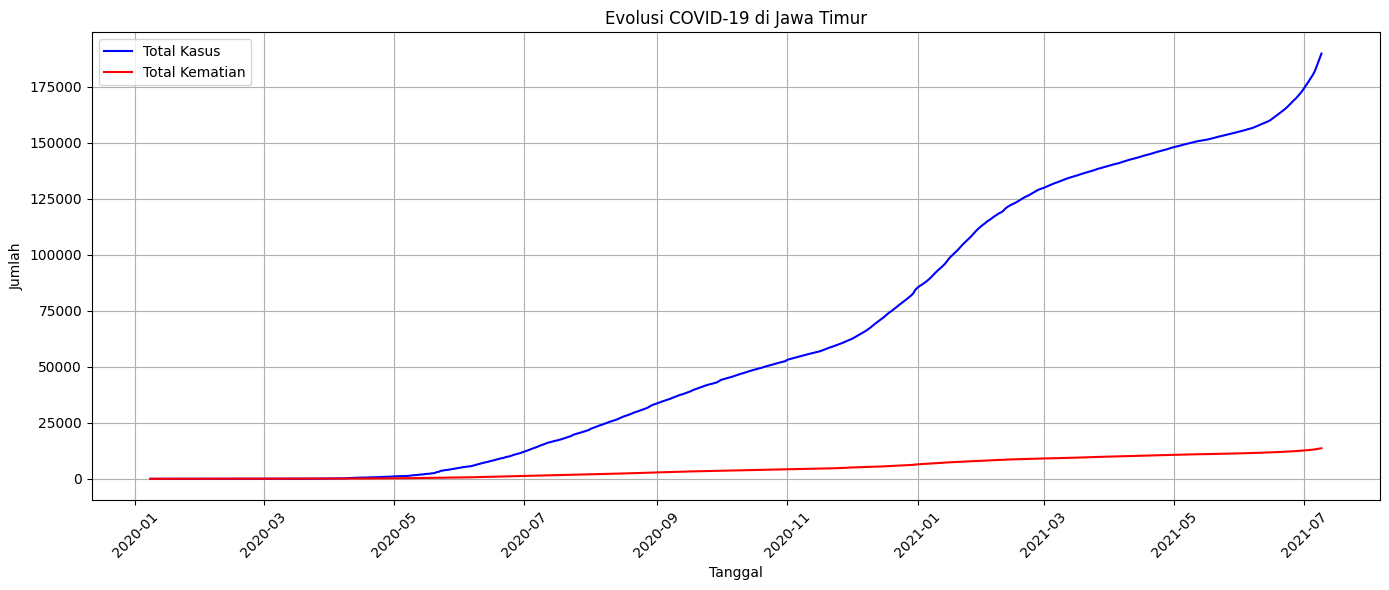

Puncak kasus baru: 2021-07-08 - 2551 kasus


In [14]:
# Studi Kasus 1: Tren di Jawa Timur
jiwa_timur = df[df['Location'] == 'JAWA TIMUR'].sort_values('Date')

plt.figure(figsize=(14, 6))
plt.plot(jiwa_timur['Date'], jiwa_timur['Total Cases'], label='Total Kasus', color='blue')
plt.plot(jiwa_timur['Date'], jiwa_timur['Total Deaths'], label='Total Kematian', color='red')
plt.title('Evolusi COVID-19 di Jawa Timur')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Puncak kasus baru
peak_date = jiwa_timur.loc[jiwa_timur['New Cases'].idxmax()]
print(f"Puncak kasus baru: {peak_date['Date'].date()} - {peak_date['New Cases']} kasus")

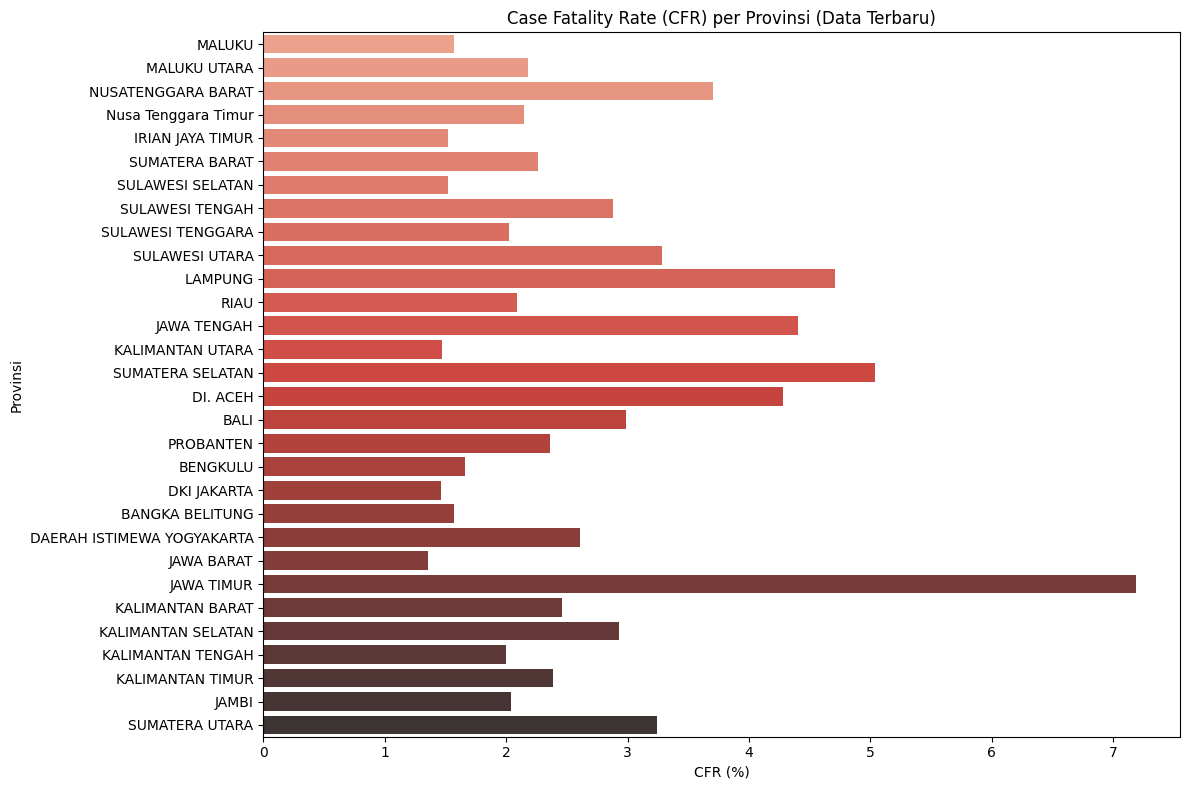

5 Provinsi dengan CFR Tertinggi:
               Location  Case Fatality Rate  Total Cases
16259        JAWA TIMUR                7.19       189705
16281  SUMATERA SELATAN                5.04        31147
16267           LAMPUNG                4.71        24378
16258       JAWA TENGAH                4.40       285348
16249          DI. ACEH                4.28        20140


In [15]:
# Studi Kasus 2: CFR per Provinsi (data terbaru per provinsi)
latest = df[df['Location Level'] == 'Province'].sort_values('Date').drop_duplicates('Location', keep='last').copy()

# Convert 'Case Fatality Rate' to numeric, handling errors
latest['Case Fatality Rate'] = pd.to_numeric(latest['Case Fatality Rate'].astype(str).str.replace('%', ''), errors='coerce')

plt.figure(figsize=(12, 8))
sns.barplot(data=latest, y='Location', x='Case Fatality Rate', palette='Reds_d')
plt.title('Case Fatality Rate (CFR) per Provinsi (Data Terbaru)')
plt.xlabel('CFR (%)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

# 5 provinsi dengan CFR tertinggi
top_cfr = latest.nlargest(5, 'Case Fatality Rate')[['Location', 'Case Fatality Rate', 'Total Cases']]
print("5 Provinsi dengan CFR Tertinggi:")
print(top_cfr)

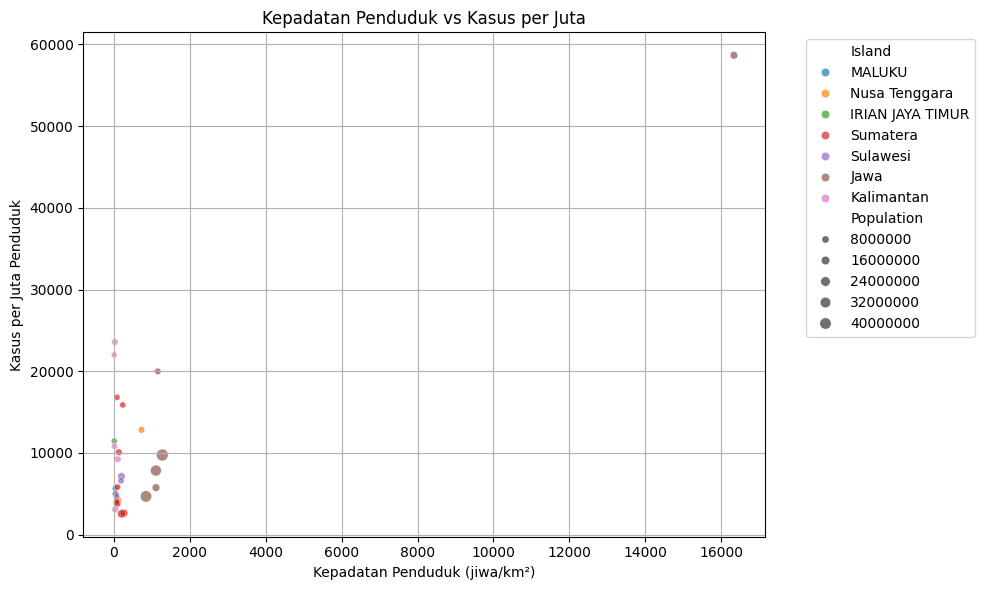

Korelasi Kepadatan vs Kasus per Juta: 0.841


In [16]:
# Studi Kasus 3: Kepadatan vs Kasus per Juta
prov_latest = df[df['Location Level'] == 'Province'].sort_values('Date').drop_duplicates('Location', keep='last')
prov_latest['Cases per Million'] = prov_latest['Total Cases'] / (prov_latest['Population'] / 1_000_000)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=prov_latest, x='Population Density', y='Cases per Million', size='Population', hue='Island', alpha=0.7)
plt.title('Kepadatan Penduduk vs Kasus per Juta')
plt.xlabel('Kepadatan Penduduk (jiwa/km²)')
plt.ylabel('Kasus per Juta Penduduk')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasi
corr = prov_latest['Population Density'].corr(prov_latest['Cases per Million'])
print(f"Korelasi Kepadatan vs Kasus per Juta: {corr:.3f}")

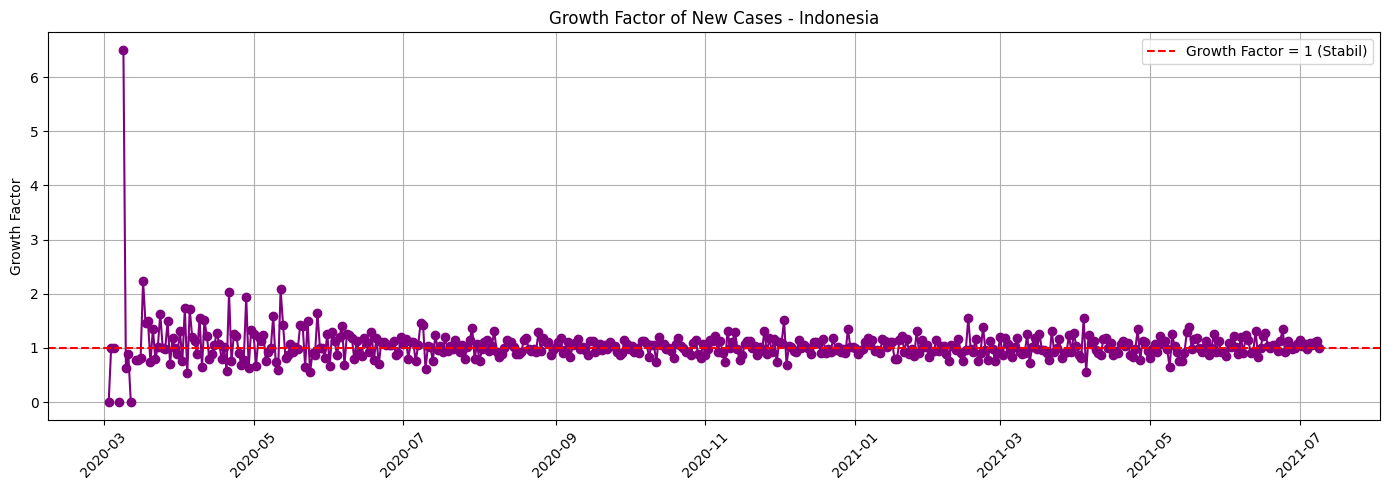

Ada 15 hari dengan growth factor > 1.5


In [17]:
# Studi Kasus 4: Growth Factor Nasional
indo = df[df['Location'] == 'Indonesia'].sort_values('Date')

plt.figure(figsize=(14, 5))
plt.plot(indo['Date'], indo['Growth Factor of New Cases'], marker='o', color='purple')
plt.axhline(1, color='red', linestyle='--', label='Growth Factor = 1 (Stabil)')
plt.title('Growth Factor of New Cases - Indonesia')
plt.ylabel('Growth Factor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Periode eksponensial
high_growth = indo[indo['Growth Factor of New Cases'] > 1.5]
print(f"Ada {len(high_growth)} hari dengan growth factor > 1.5")

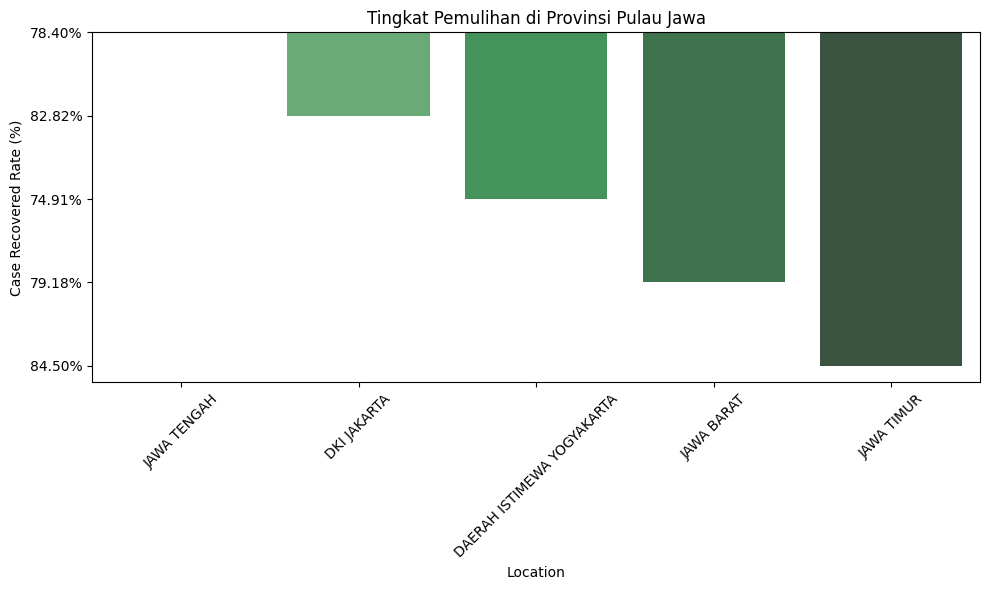

Active Cases di Jawa:
                         Location  Total Active Cases
16253                 DKI JAKARTA              100053
16257                  JAWA BARAT               85677
16258                 JAWA TENGAH               49080
16254  DAERAH ISTIMEWA YOGYAKARTA               16316
16259                  JAWA TIMUR               15774


In [18]:
# Studi Kasus 5: Pulau Jawa
jawa_provinces = ['DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'BANTEN', 'DAERAH ISTIMEWA YOGYAKARTA']
jawa = df[df['Location'].isin(jawa_provinces)].sort_values('Date').drop_duplicates('Location', keep='last')

plt.figure(figsize=(10, 6))
sns.barplot(data=jawa, x='Location', y='Case Recovered Rate', palette='Greens_d')
plt.title('Tingkat Pemulihan di Provinsi Pulau Jawa')
plt.ylabel('Case Recovered Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Active cases
jawa_active = jawa[['Location', 'Total Active Cases']].sort_values('Total Active Cases', ascending=False)
print("Active Cases di Jawa:")
print(jawa_active)

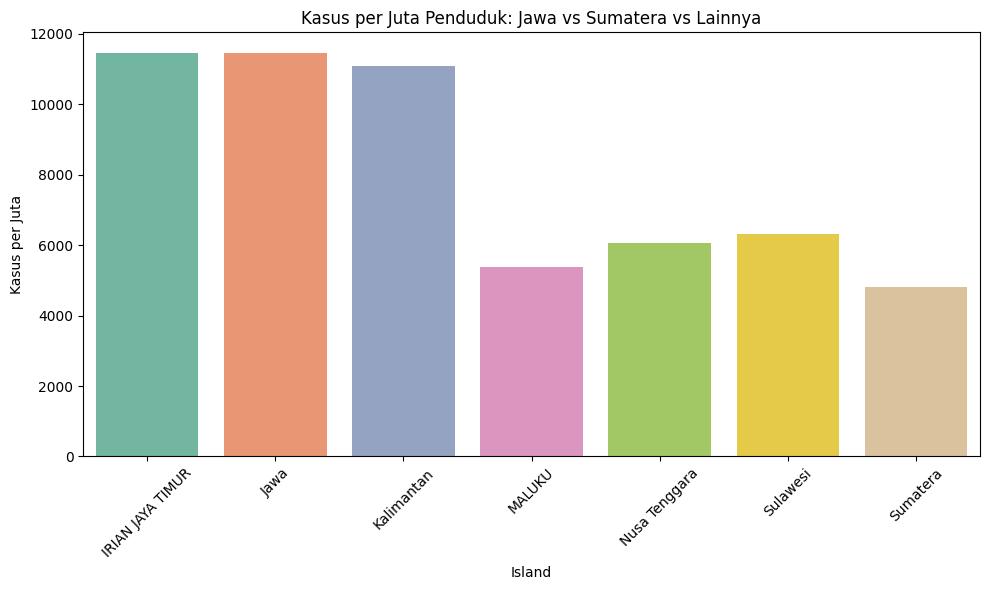

In [19]:
# Studi Kasus 6: Jawa vs Sumatera
latest_by_island = df[df['Location Level'] == 'Province'].sort_values('Date').drop_duplicates('Location', keep='last')
island_summary = latest_by_island.groupby('Island').agg({
    'Total Cases': 'sum',
    'Total Deaths': 'sum',
    'Population': 'sum'
}).reset_index()

island_summary['Cases per Million'] = island_summary['Total Cases'] / (island_summary['Population'] / 1_000_000)

plt.figure(figsize=(10, 6))
sns.barplot(data=island_summary, x='Island', y='Cases per Million', palette='Set2')
plt.title('Kasus per Juta Penduduk: Jawa vs Sumatera vs Lainnya')
plt.ylabel('Kasus per Juta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

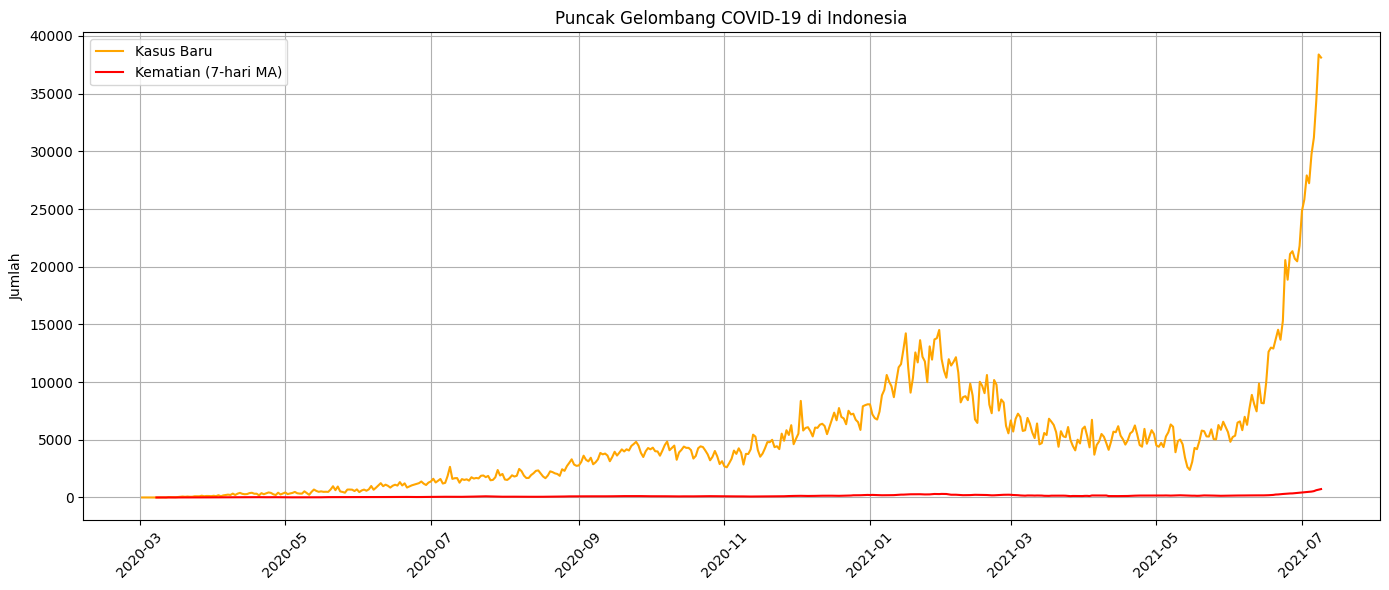

3 Puncak Kasus Baru:
             Date  New Cases
16221  2021-07-08      38391
16255  2021-07-09      38124
16187  2021-07-07      34379


In [20]:
# Studi Kasus 7: Puncak Gelombang
indo = df[df['Location'] == 'Indonesia'].sort_values('Date')

plt.figure(figsize=(14, 6))
plt.plot(indo['Date'], indo['New Cases'], label='Kasus Baru', color='orange')
plt.plot(indo['Date'], indo['New Deaths'].rolling(7).mean(), label='Kematian (7-hari MA)', color='red')
plt.title('Puncak Gelombang COVID-19 di Indonesia')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3 puncak tertinggi
peaks = indo.nlargest(3, 'New Cases')[['Date', 'New Cases']]
peaks['Date'] = peaks['Date'].dt.date
print("3 Puncak Kasus Baru:")
print(peaks)

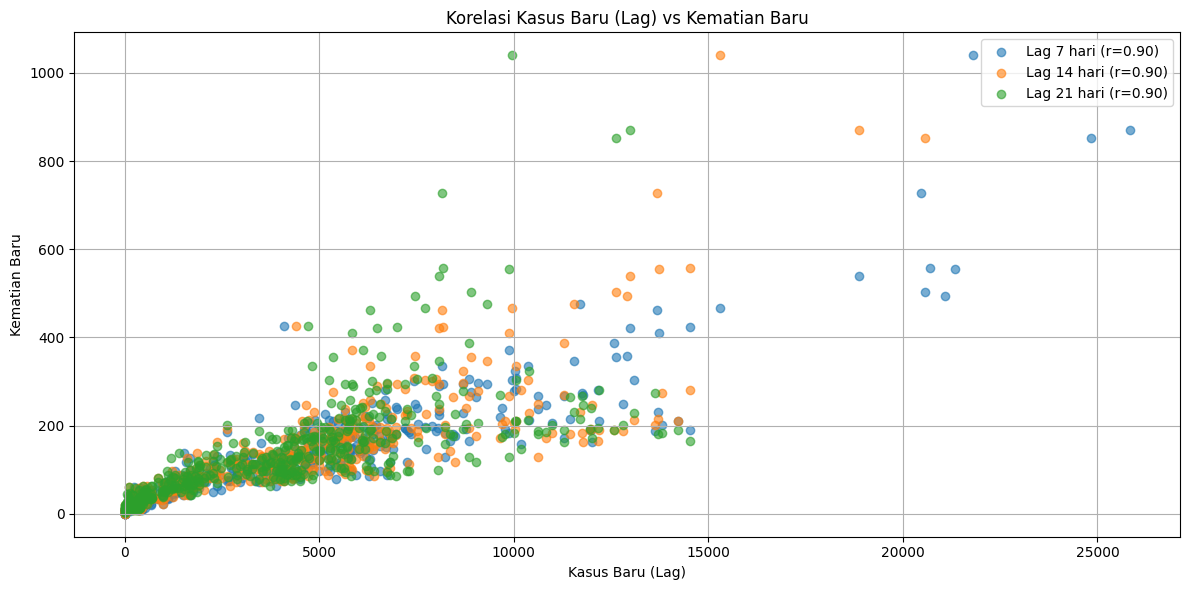

Lag terbaik: 14 hari (korelasi = 0.817)


In [21]:
# Studi Kasus 8: Lag Kasus-Kematian
indo = df[df['Location'] == 'Indonesia'].set_index('Date')

# Hitung lag 7, 14, 21 hari
lags = [7, 14, 21]
plt.figure(figsize=(12, 6))
for lag in lags:
    indo[f'New Cases Lag {lag}'] = indo['New Cases'].shift(lag)
    corr = indo['New Cases Lag 7'].corr(indo['New Deaths'])
    plt.scatter(indo[f'New Cases Lag {lag}'], indo['New Deaths'], label=f'Lag {lag} hari (r={corr:.2f})', alpha=0.6)

plt.title('Korelasi Kasus Baru (Lag) vs Kematian Baru')
plt.xlabel('Kasus Baru (Lag)')
plt.ylabel('Kematian Baru')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_lag = 14
corr_best = indo['New Cases'].shift(best_lag).corr(indo['New Deaths'])
print(f"Lag terbaik: {best_lag} hari (korelasi = {corr_best:.3f})")

In [22]:
# Studi Kasus 9: Peta (menggunakan Plotly)
import plotly.express as px

prov_map = df[df['Location Level'] == 'Province'].sort_values('Date').drop_duplicates('Location', keep='last')
prov_map['Cases per Million'] = prov_map['Total Cases'] / (prov_map['Population'] / 1_000_000)

fig = px.scatter_mapbox(
    prov_map, lat="Latitude", lon="Longitude",
    size="Total Cases", color="Cases per Million",
    hover_name="Location", hover_data=["Total Cases", "Total Deaths"],
    zoom=4, height=600,
    title="Peta Penyebaran COVID-19 per Provinsi (Kasus per Juta)",
    color_continuous_scale="Reds"
)
fig.update_layout(mapbox_style="carto-positron")
fig.show()

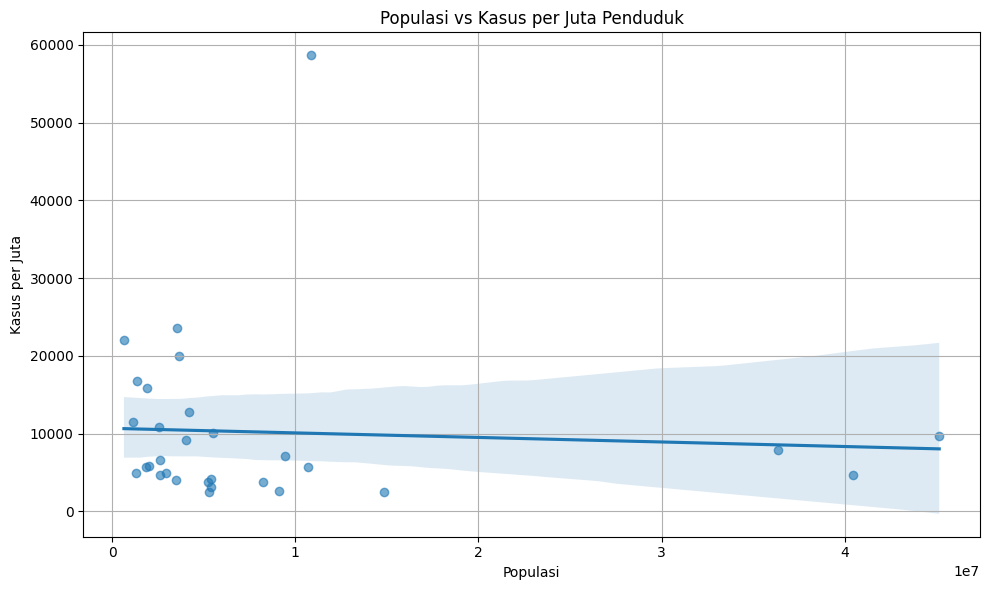

Korelasi Populasi vs Kasus per Juta: -0.062


In [23]:
# Studi Kasus 10: Populasi vs Kasus per Juta
prov_latest = df[df['Location Level'] == 'Province'].sort_values('Date').drop_duplicates('Location', keep='last')
prov_latest['Cases per Million'] = prov_latest['Total Cases'] / (prov_latest['Population'] / 1_000_000)

plt.figure(figsize=(10, 6))
sns.regplot(data=prov_latest, x='Population', y='Cases per Million', scatter_kws={'alpha':0.6})
plt.title('Populasi vs Kasus per Juta Penduduk')
plt.xlabel('Populasi')
plt.ylabel('Kasus per Juta')
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasi
corr_pop = prov_latest['Population'].corr(prov_latest['Cases per Million'])
print(f"Korelasi Populasi vs Kasus per Juta: {corr_pop:.3f}")